In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, OneClassSVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import matplotlib.patches as mpatches
import time


1. Скачайте датасет с https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.
2. Проведите небольшой EDA (гистограммы и описательные статистики - обязательно)
3. Воспользуйтесь процентом аномалий, подсчитанным по переменной Class, как "экспертной оценкой" загрязненности нашего датасета
4. Попробуйте построить различные модели и алгоритмы, разобранные на занятии, используя полученную экспертную оценку для настройки параметров
5. Воспользуйтесь стандартными методами оценки качества бинарной классификации (особенно хорошо подойдёт classification report и confusion matrix), и, используя предсказания моделей и переменную Class, проверьте, действительно ли модели справляются со своей задачей и на сколько хорошо они это делают
6. При помощи tSNE и/или UMAP, постройте сжатое представление исходных данных и проверьте, действительно ли аномалии лежат достаточно далеко от основной массы точек

In [2]:
df = pd.read_csv("creditcard.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
while len(df) < 284807:
  df = pd.read_csv("creditcard.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## EDA

In [5]:
df

Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]

In [6]:
df.describe()

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.918649e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
# Только по Class = 1
df.loc[df['Class'] == 1,:].describe()

Time          V1          V2  ...         V28       Amount  Class
count     492.000000  492.000000  492.000000  ...  492.000000   492.000000  492.0
mean    80746.806911   -4.771948    3.623778  ...    0.075667   122.211321    1.0
std     47835.365138    6.783687    4.291216  ...    0.547291   256.683288    0.0
min       406.000000  -30.552380   -8.402154  ...   -1.869290     0.000000    1.0
25%     41241.500000   -6.036063    1.188226  ...   -0.108868     1.000000    1.0
50%     75568.500000   -2.342497    2.717869  ...    0.146344     9.250000    1.0
75%    128483.000000   -0.419200    4.971257  ...    0.381152   105.890000    1.0
max    170348.000000    2.132386   22.057729  ...    1.779364  2125.870000    1.0

[8 rows x 31 columns]

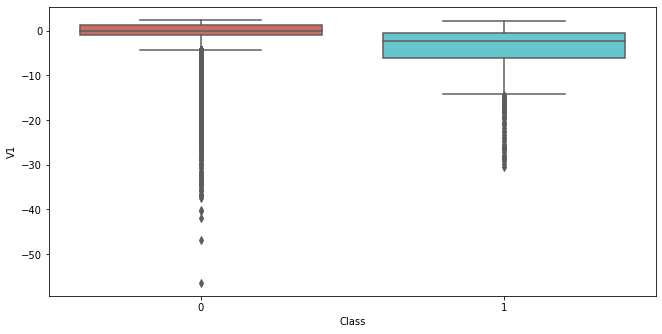

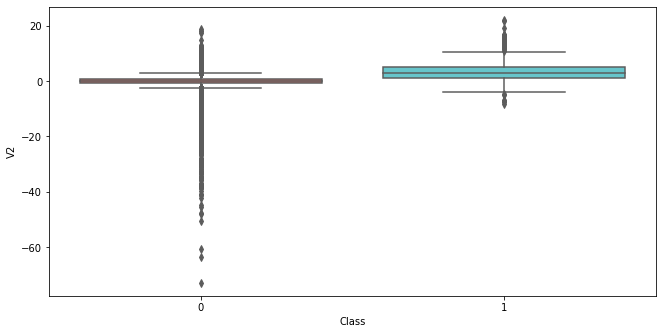

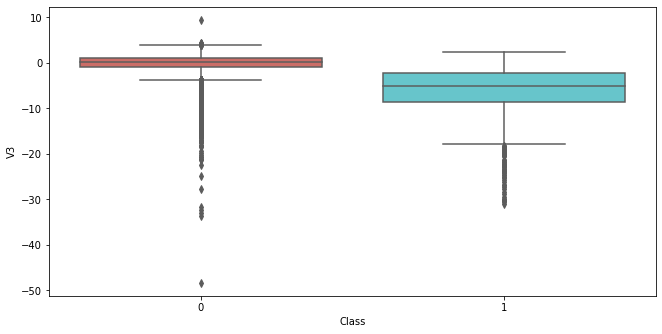

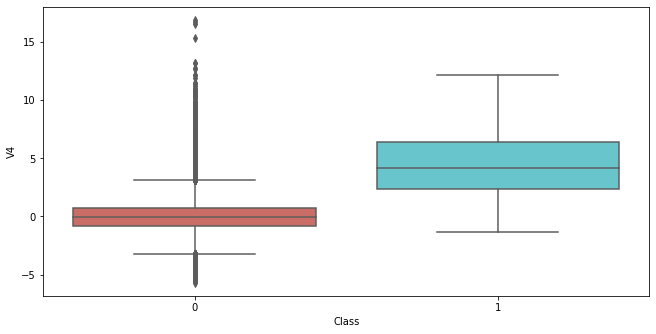

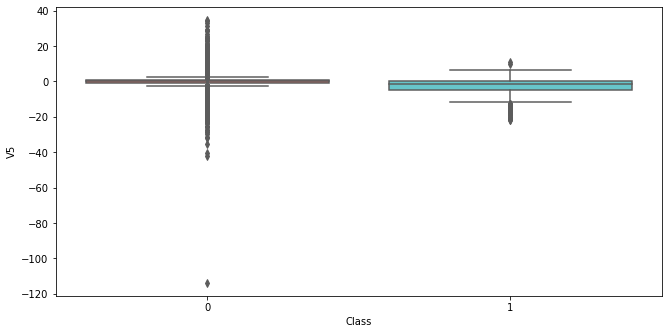

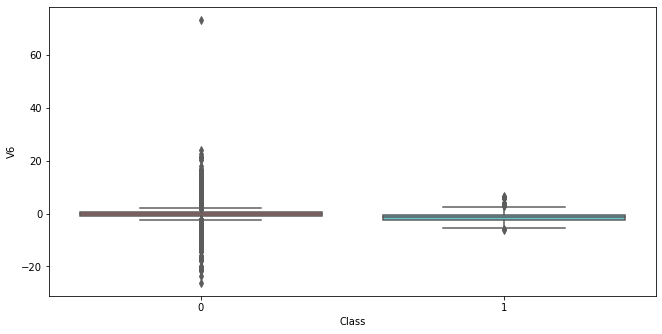

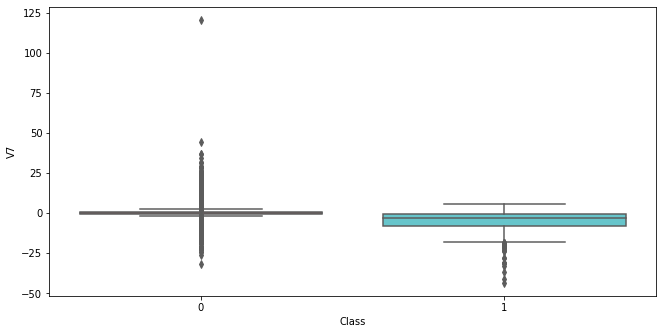

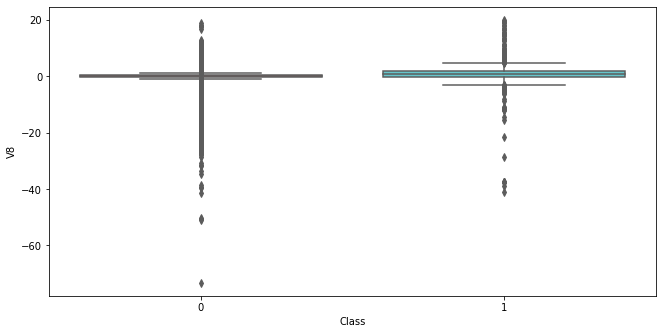

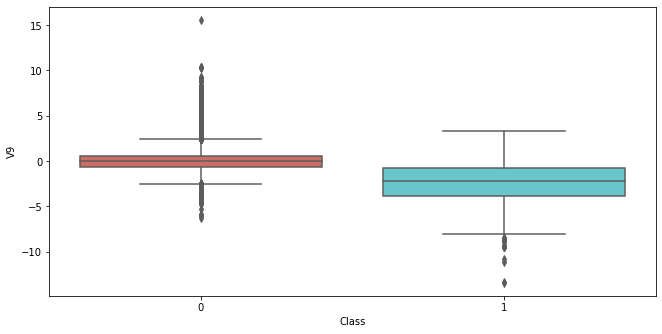

In [119]:
j = 1
for i, column in enumerate(df.columns[1:10]):
  plt.figure(figsize = (50,50))
  #print(j, 8*100+4*10+j)
  g = plt.subplot(8*100+4*10+j)
  j = j+1 if j <= 9 else 1
  g = sns.boxplot(y=column, data=df, palette="hls", 
                   x = "Class")
  plt.show()

Очень сильный дисбаланс классов

Class 0: 284315
Class 1: 492


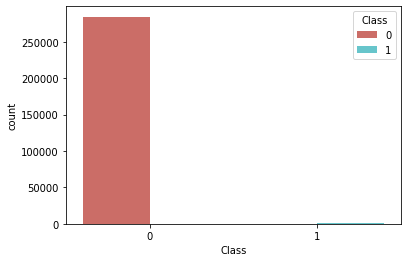

In [66]:
sns.countplot(x='Class', hue='Class',data=df, palette="hls")
print("Class 0:", df['Class'].value_counts()[0])
print("Class 1:", df['Class'].value_counts()[1])

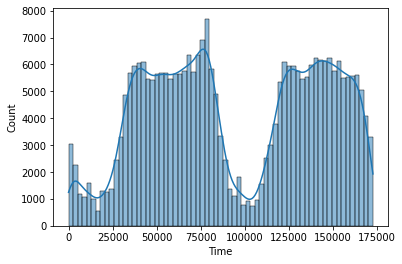

In [67]:
sns.histplot(data=df, x='Time', kde=True, palette="hls")

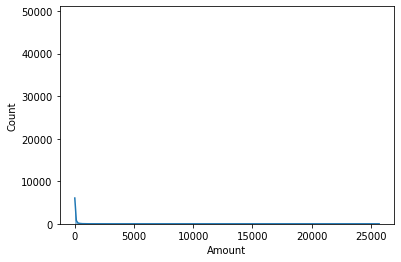

In [68]:
sns.histplot(data=df, x='Amount', kde=True, palette="hls")

## Preprocessing

In [4]:
df = df.fillna(0)
df['Class'] = df['Class'].astype(int)

Попробуем просто просемлировать данные и уравнять классы, оставив столько же меток 0, сколько и меток 1

In [5]:
df = df.sample(frac=1)
n_1 = len(df.loc[df['Class'] == 1, :])

df_0 = df.loc[df['Class'] == 1,:]
df_1 = df.loc[df['Class'] == 0, :][:n_1]

df_balanced = pd.concat([df_0, df_1])

df_new = df_balanced.sample(frac=1, random_state=42)


Стандартизируем время и количество

In [6]:
df_new['Amount'] = StandardScaler().fit_transform(df_new['Amount'].values.reshape(-1,1))
df_new['Time'] = StandardScaler().fit_transform(df_new['Time'].values.reshape(-1,1))

In [7]:
print("Class 0:", df_new['Class'].value_counts()[0])
print("Class 1:", df_new['Class'].value_counts()[1])

Class 0: 492
Class 1: 492


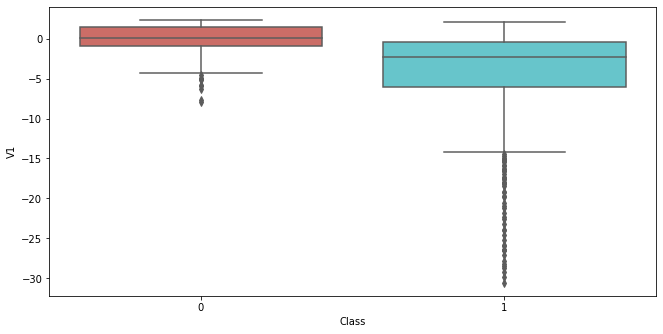

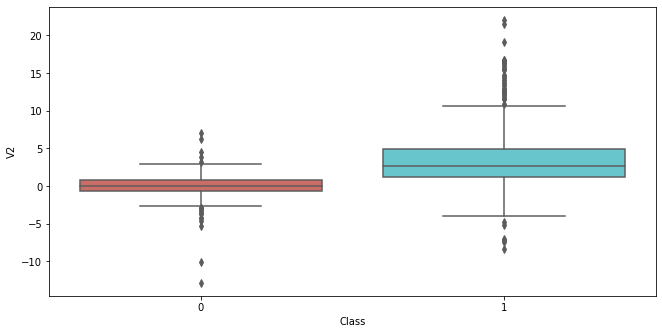

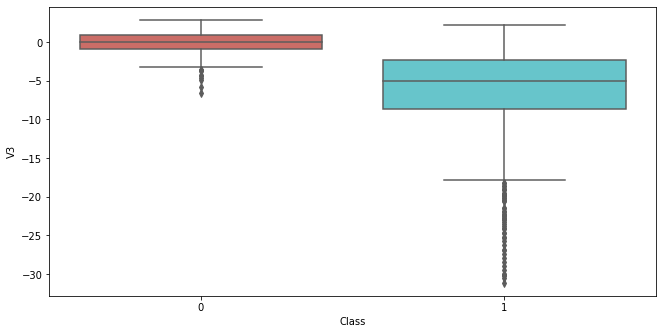

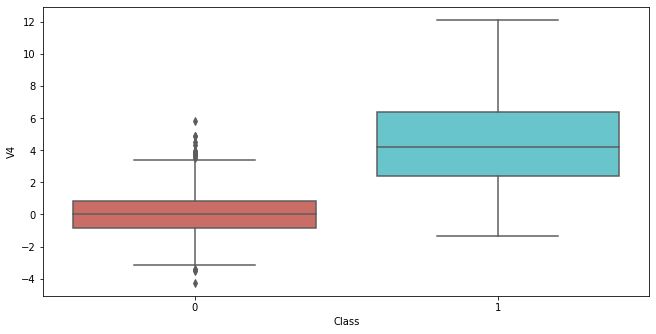

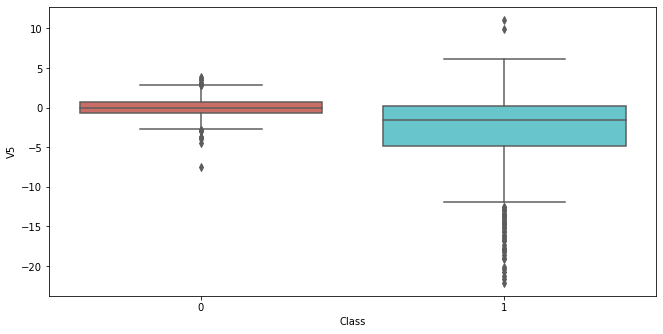

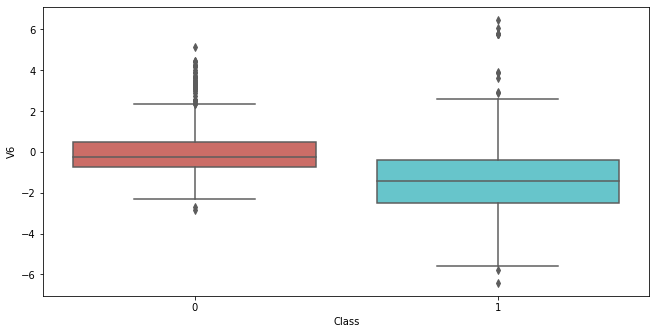

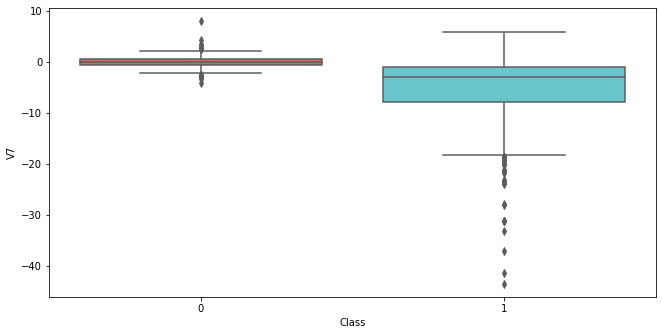

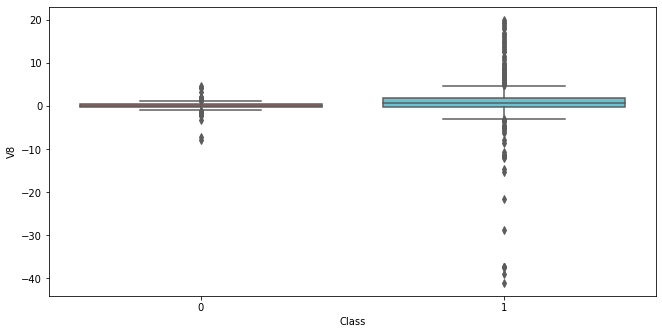

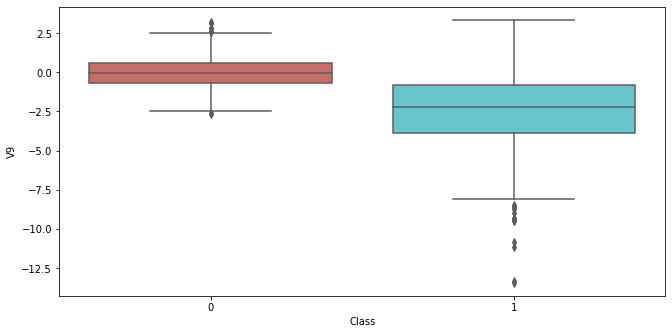

In [16]:
j = 1
for i, column in enumerate(df_new.columns[1:10]):
  plt.figure(figsize = (50,50))
  #print(j, 8*100+4*10+j)
  g = plt.subplot(8*100+4*10+j)
  j = j+1 if j <= 9 else 1
  g = sns.boxplot(y=column, data=df_new, palette="hls", 
                   x = "Class")
  plt.show()

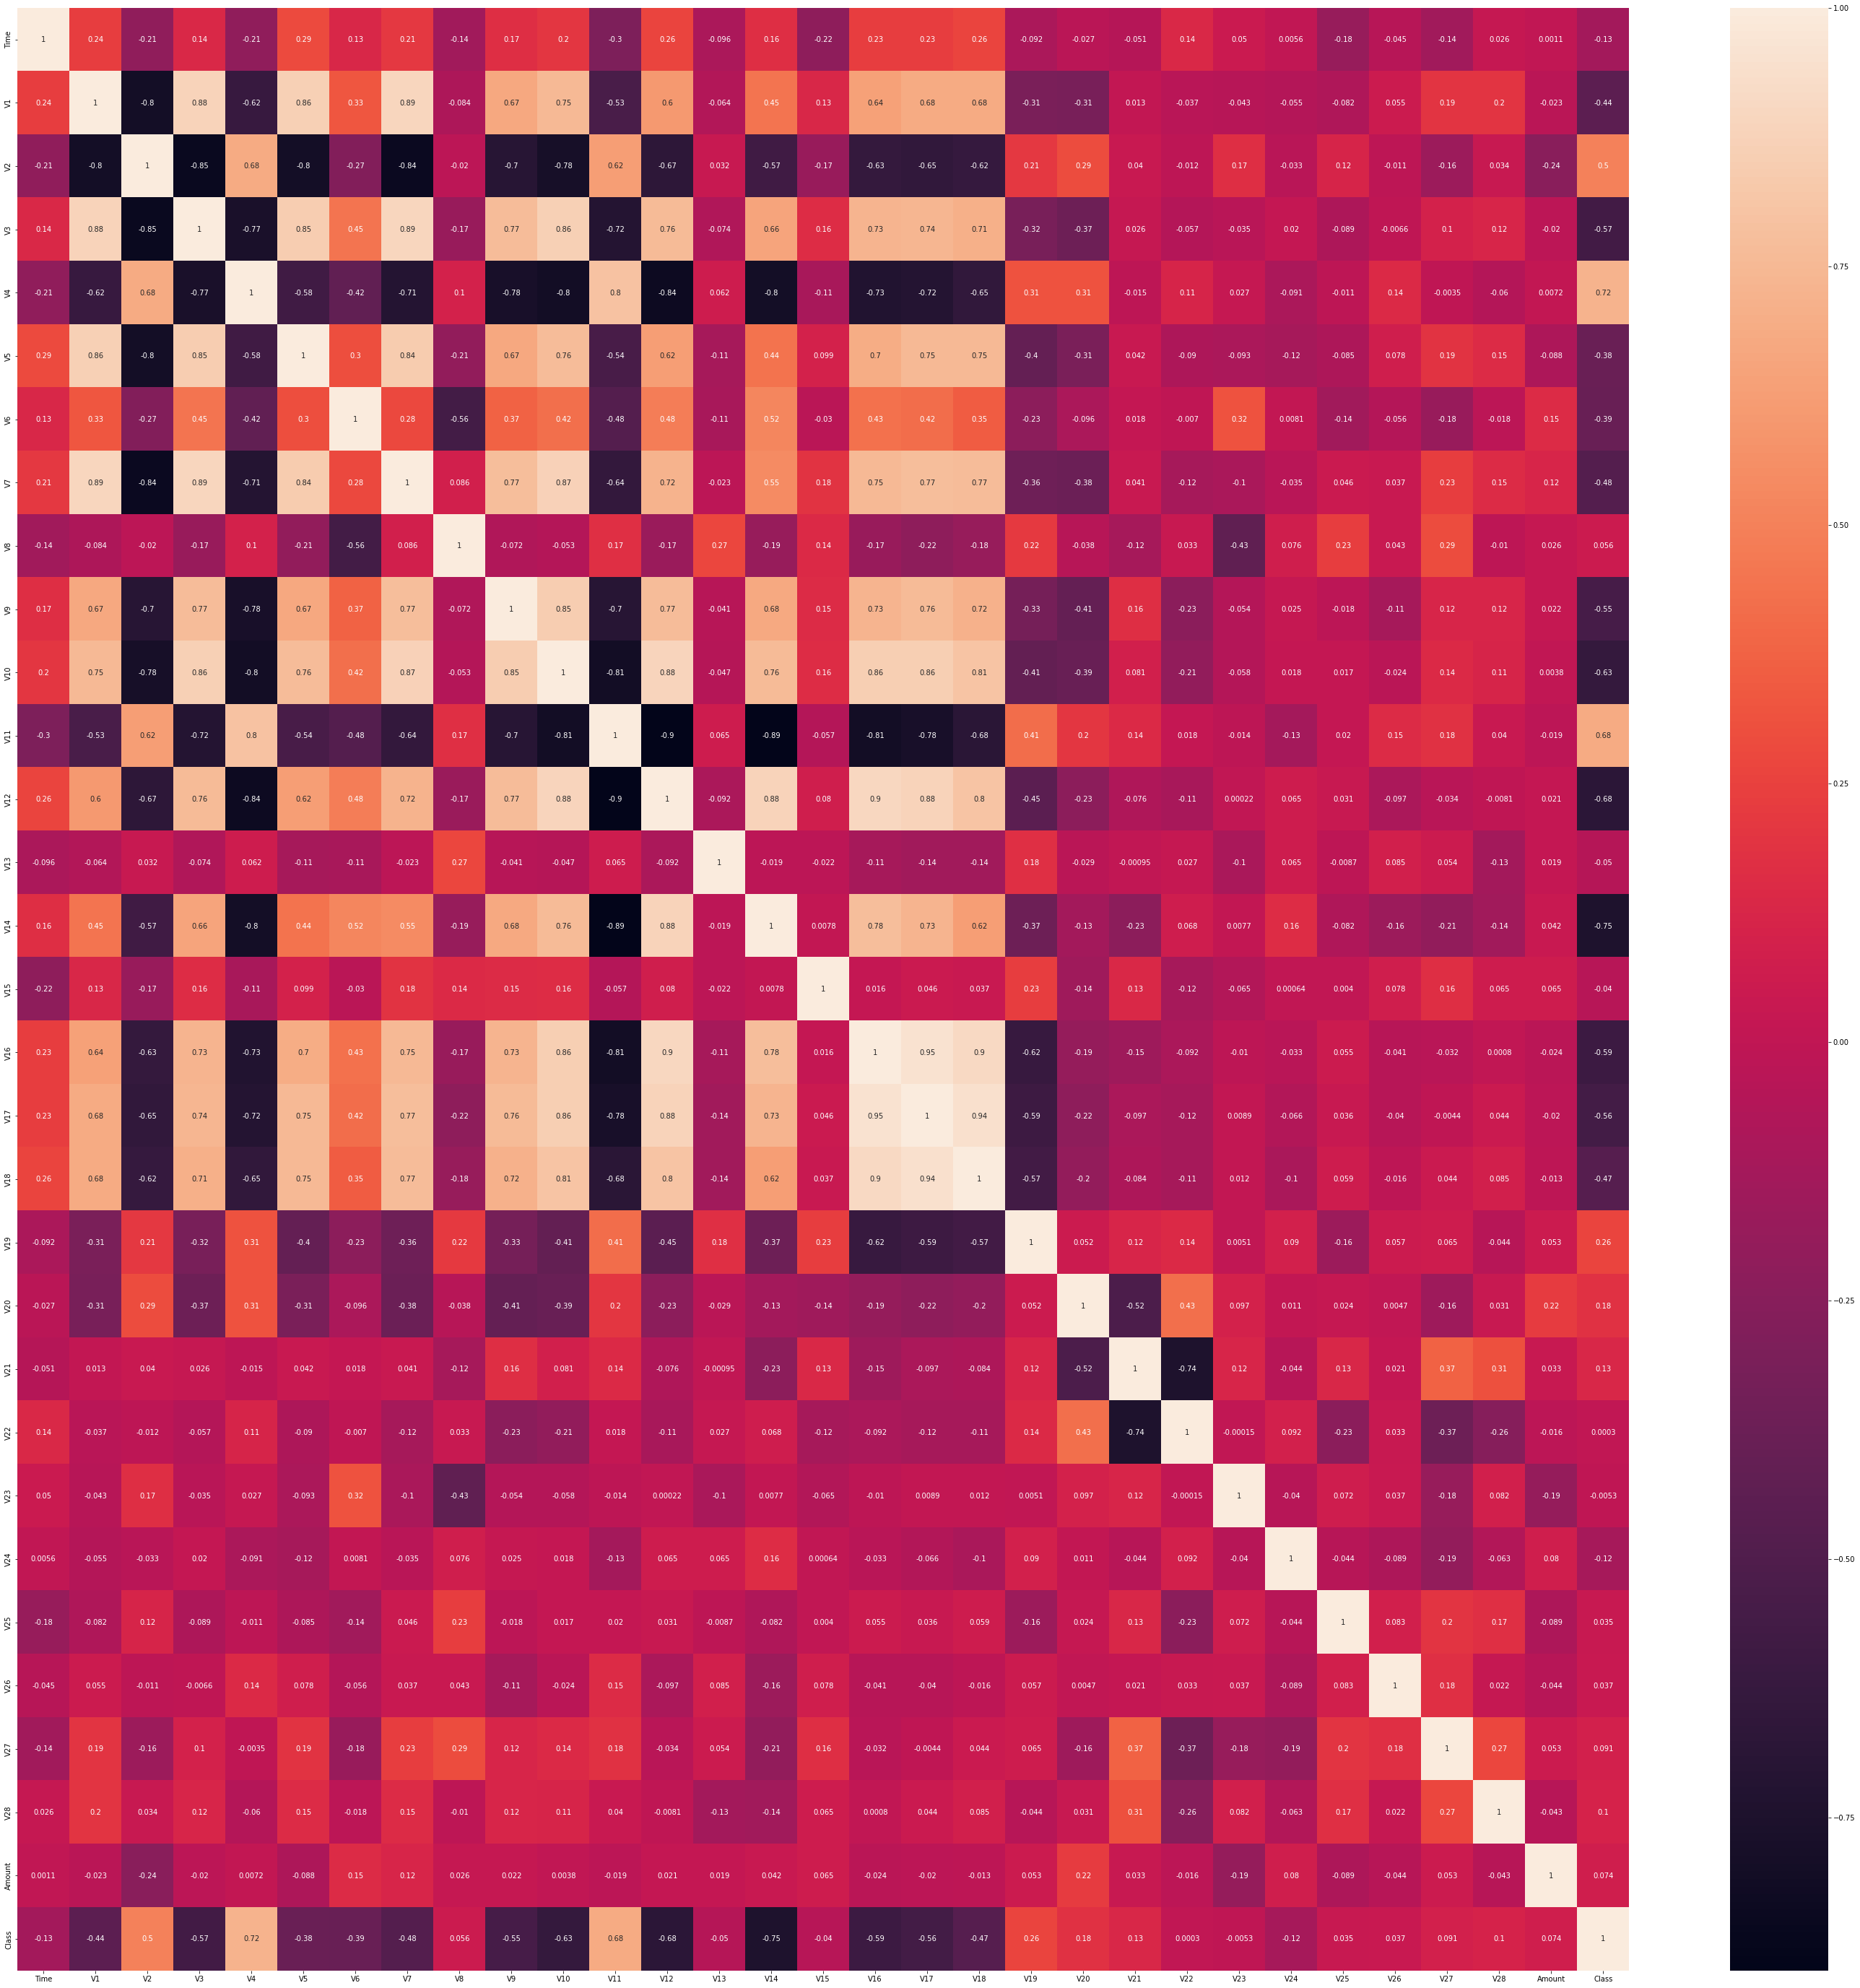

In [80]:
plt.figure(figsize = (50,50))
sns.heatmap(df_new.corr(), annot=True)

## Classification

In [8]:
X = df_new.drop(["Class"], axis=1)
y = df_new['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler1 = scaler2 = StandardScaler()

X_train['Amount'] = scaler1.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount'] = scaler1.transform(X_test['Amount'].values.reshape(-1,1))

X_train['Time'] = scaler2.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Time'] = scaler2.transform(X_test['Amount'].values.reshape(-1,1))

#### RandomForest

In [9]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9187817258883249

In [10]:
print(sklearn.metrics.classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       101
           1       0.95      0.88      0.91        96

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



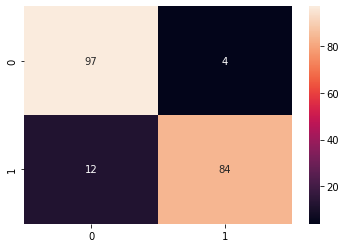

In [11]:
matrix = sklearn.metrics.confusion_matrix(y_test, rfc.predict(X_test))
sns.heatmap(matrix, annot=True)

#### LogisticRegression

In [12]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
logr.score(X_test, y_test)

0.934010152284264

In [13]:
print(sklearn.metrics.classification_report(y_test, logr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       101
           1       0.98      0.89      0.93        96

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



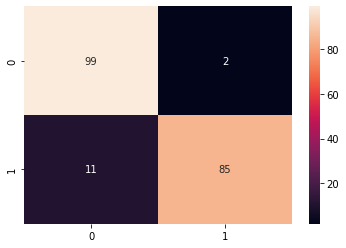

In [14]:
matrix = sklearn.metrics.confusion_matrix(y_test, logr.predict(X_test))
sns.heatmap(matrix, annot=True)

#### KNeighbors

In [15]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

0.9187817258883249

In [16]:
print(sklearn.metrics.classification_report(y_test, kn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       101
           1       0.98      0.85      0.91        96

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



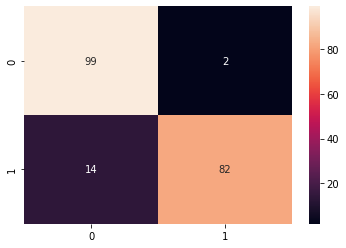

In [17]:
matrix = sklearn.metrics.confusion_matrix(y_test, kn.predict(X_test))
sns.heatmap(matrix, annot=True)

f1-score 92-93%
precision 88-89%

Все алгоритмы довольно точно классифицируют метки

## AnomalyDetection

In [18]:
def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))    

IsolationForest

In [85]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, 
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(X)

isolation_outliers = isolation_forest.predict(X)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [86]:
anomalies_report(isolation_outliers)

Total number of outliers: 99
Percentage of outliers:   10.06%


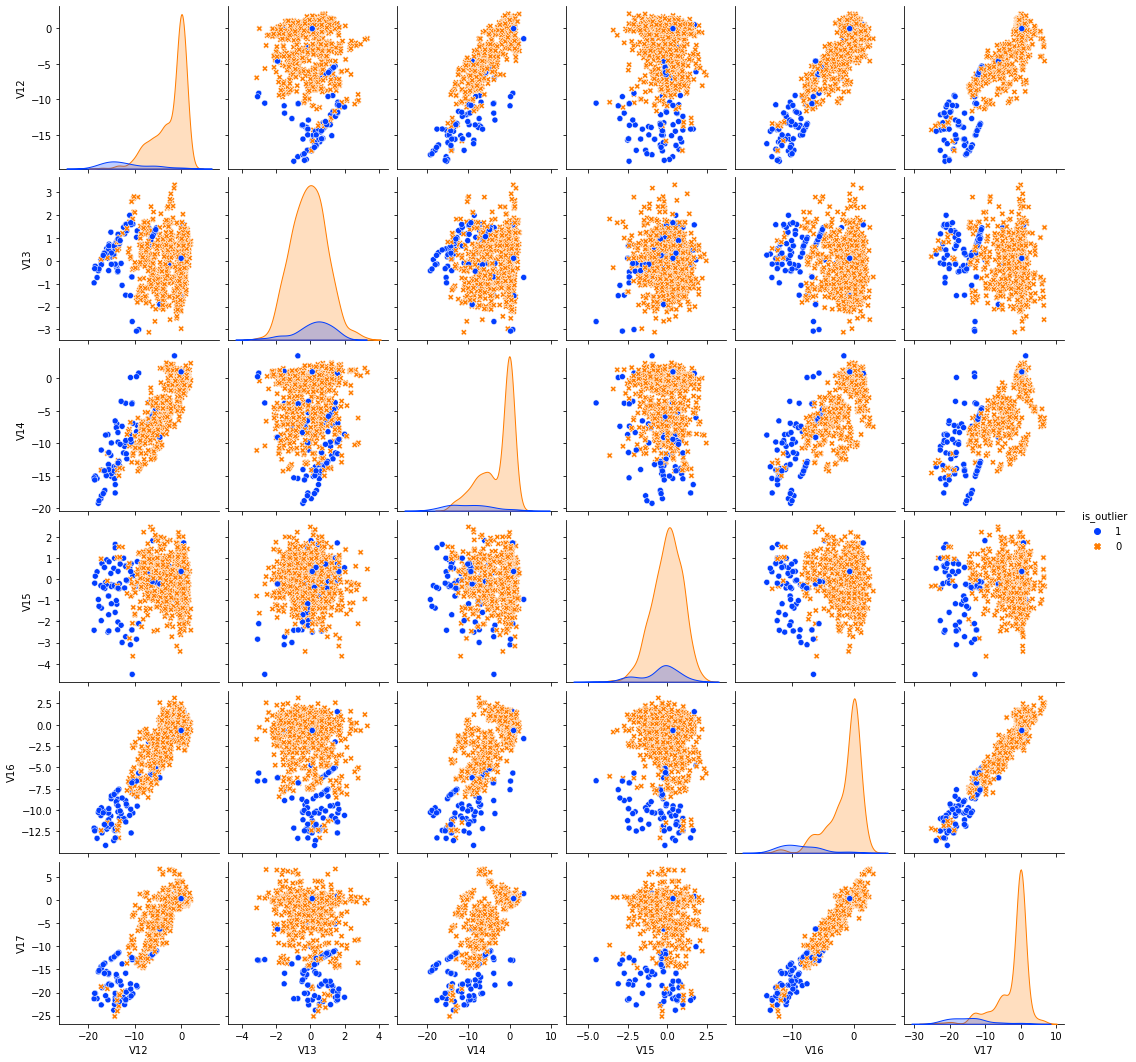

In [87]:
labeled_data = X.copy()
labeled_data['is_outlier'] = isolation_outliers

sns.pairplot(data=labeled_data, vars = ["V12", "V13", "V14", "V15", "V16", "V17"],
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

OneClassSVM



In [72]:
one_class_svm = OneClassSVM(nu=0.10, gamma='auto')
one_class_svm.fit(X)
svm_outliers = one_class_svm.predict(X)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [75]:
anomalies_report(svm_outliers)

Total number of outliers: 166
Percentage of outliers:   16.87%


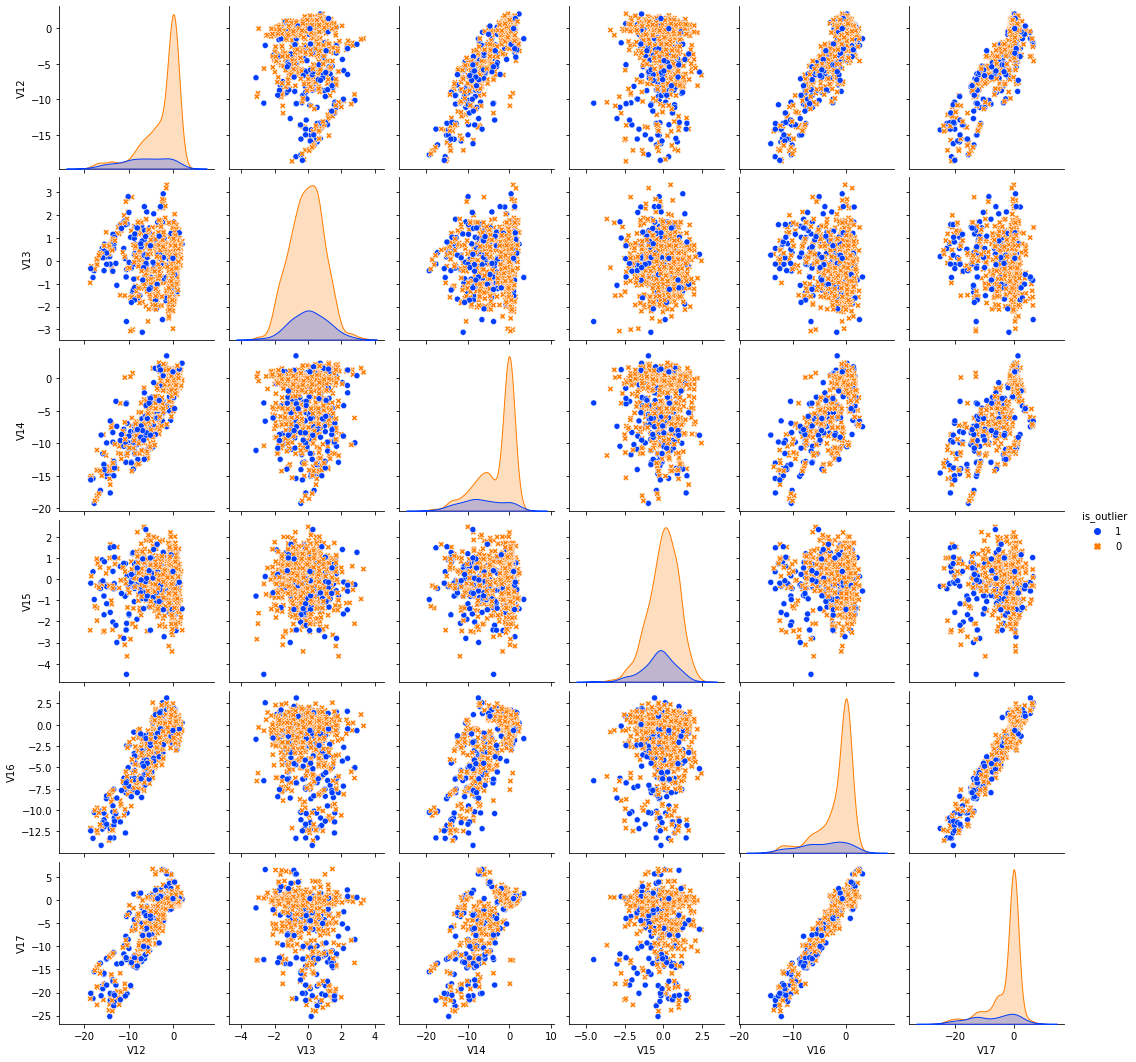

In [79]:
labeled_data = X.copy()
labeled_data['is_outlier'] = svm_outliers

sns.pairplot(data=labeled_data, vars = ["V12", "V13", "V14", "V15", "V16", "V17"],
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

DBSCAN

In [22]:
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

eps = 0.05
eps_history = [eps]
while outlier_percentage>0.1:    
    model = DBSCAN(eps=eps).fit(X)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)    
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

eps = 3.6  
model = DBSCAN(eps)
model.fit(X)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [23]:
anomalies_report(density_outlier)

Total number of outliers: 487
Percentage of outliers:   49.49%


In [24]:
print(sklearn.metrics.classification_report(y, density_outlier))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       492
           1       0.76      0.75      0.75       492

    accuracy                           0.75       984
   macro avg       0.75      0.75      0.75       984
weighted avg       0.75      0.75      0.75       984



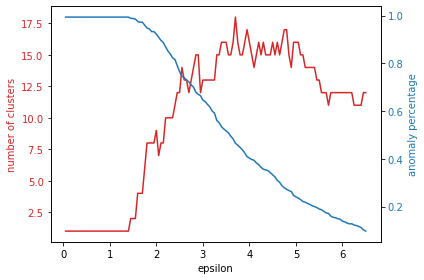

In [21]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)  
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

Кажется, что никакого смысла нет

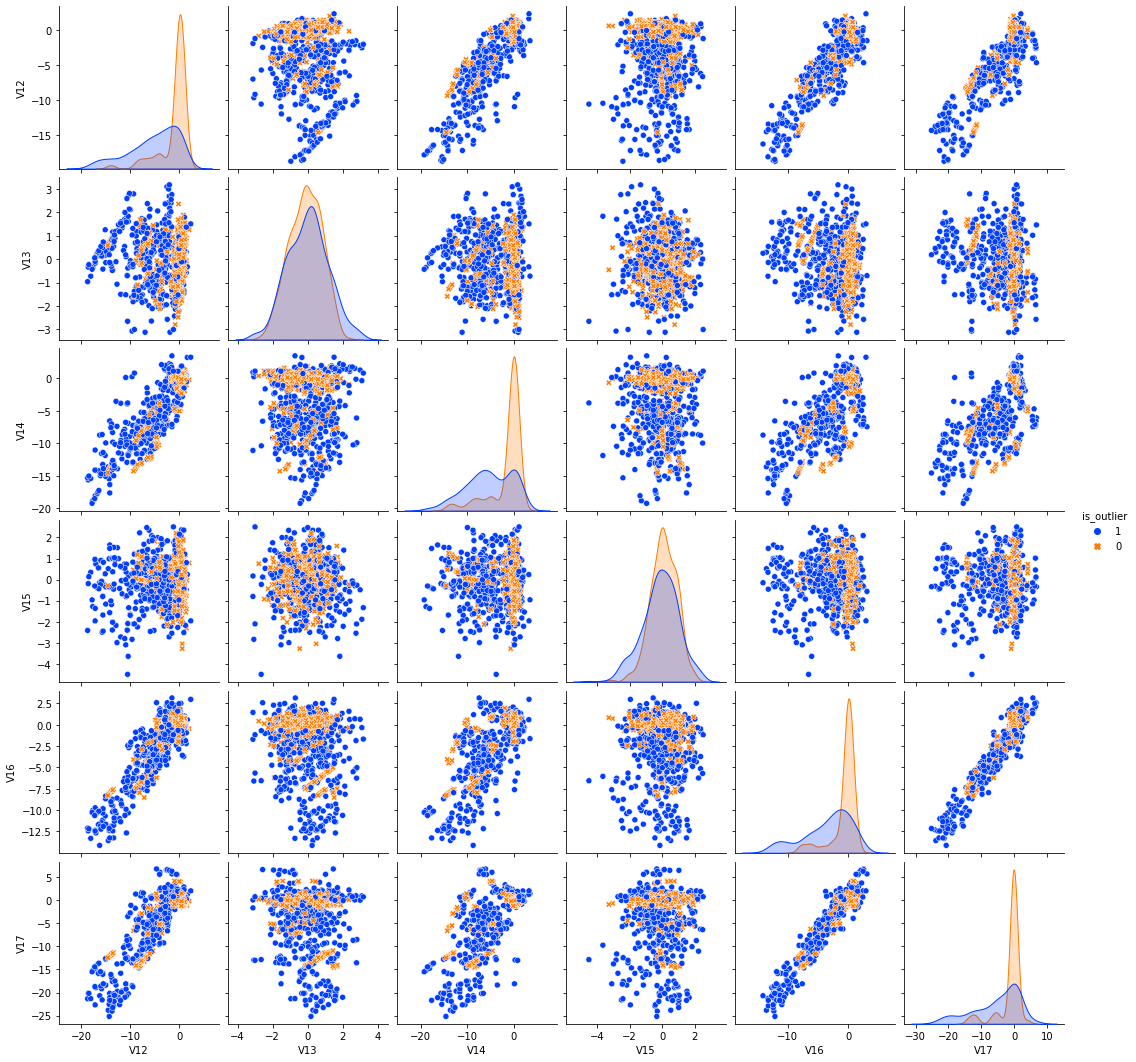

In [29]:
labeled_data = df_new.copy()
labeled_data['is_outlier'] = density_outlier

sns.pairplot(data=labeled_data, vars = ["V12", "V13", "V14", "V15", "V16", "V17"],
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

In [25]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [26]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=90)
euclidian_model.fit(X)
euclidian_outliers = euclidian_model.predict(X)
anomalies_report(euclidian_outliers)

Total number of outliers: 99
Percentage of outliers:   10.06%


Заметно, что в выбросы попали в основном одинокие точки по краям основного кластера

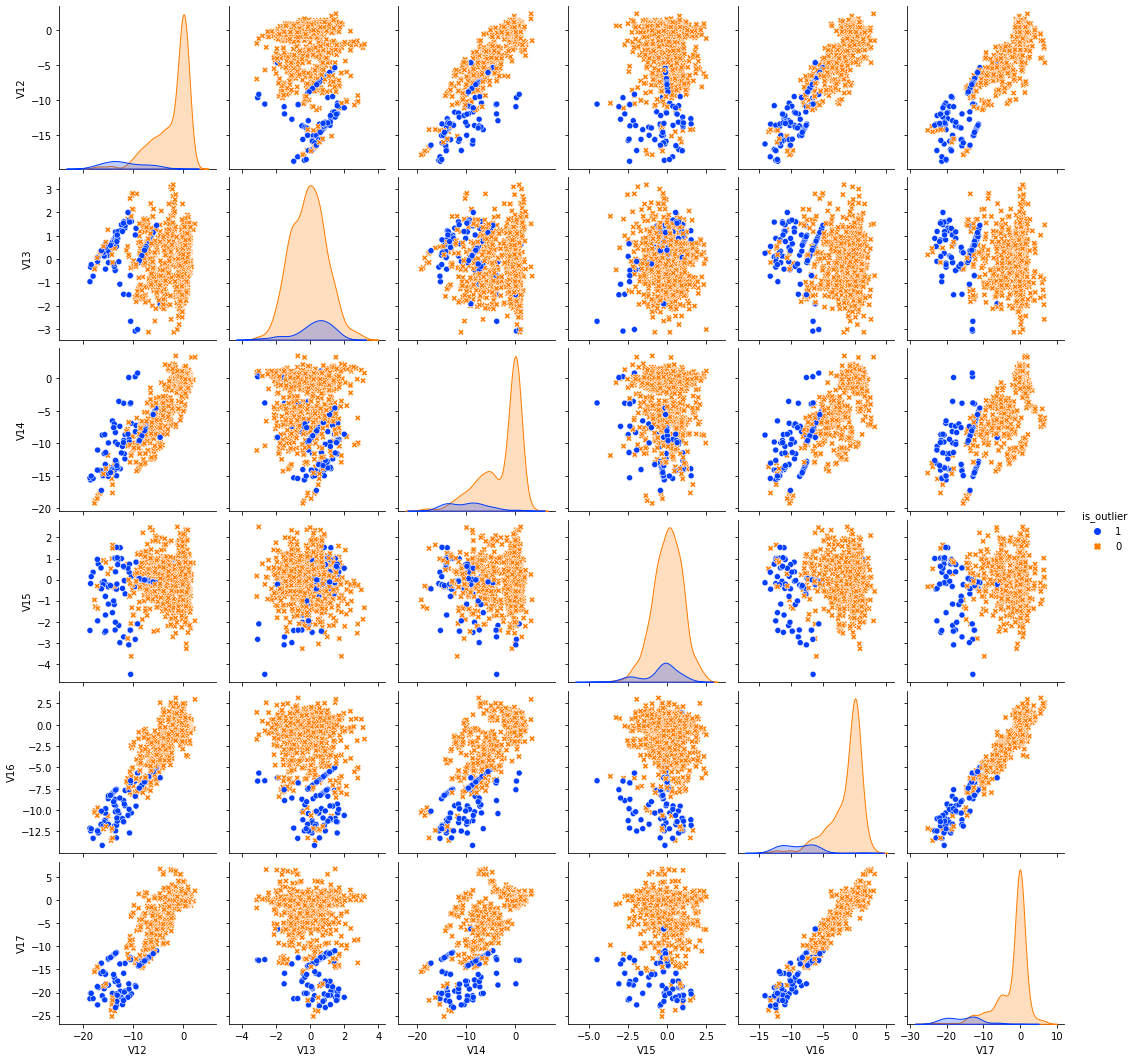

In [28]:
labeled_data = df_new.copy()
labeled_data['is_outlier'] = euclidian_outliers

sns.pairplot(data=labeled_data, vars = ["V12", "V13", "V14", "V15", "V16", "V17"],
             hue='is_outlier', hue_order=[1, 0],
             markers=['X', 'o'],  palette='bright');

## t-SNE

In [32]:
X = df_new.drop('Class', axis=1)
y = df_new['Class']


# T-SNE 
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=12).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA 
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=12).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


T-SNE took 9.0 s
PCA took 0.036 s


Выделяются даже три кластера. Возможно, два вида мошеннических действий

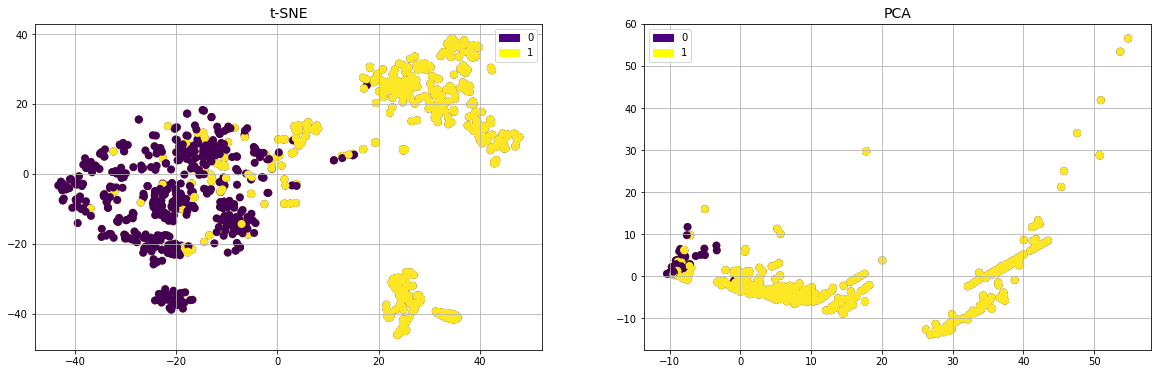

In [34]:
f, axs = plt.subplots(1, 2, figsize=(20,6))

patch0 = mpatches.Patch(color='#4B0082', label='0')
patch1 = mpatches.Patch(color='#FFFF00', label='1')

# t-SNE 
axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0),  label='0', linewidths=2)
axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1),  label='1', linewidths=2)
axs[0].set_title('t-SNE', fontsize=14)

axs[0].grid(True)
axs[0].legend(handles=[patch0, patch1])


# PCA 
axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0),  label='0', linewidths=2)
axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1),  label='1', linewidths=2)
axs[1].set_title('PCA', fontsize=14)

axs[1].grid(True)
axs[1].legend(handles=[patch0, patch1])